In [2]:
%pip install networkx 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx # type: ignore
import seaborn as sns

In [4]:
# Chung
files_df = pd.read_csv('data_processed/files.csv')
average_file_size = files_df['size'].mean()
print(f'Kích thước trung bình của các files: {average_file_size:.2f} bytes')

Kích thước trung bình của các files: 15747.33 bytes


PHÂN LOẠI FILE THEO SỐ LƯỢNG

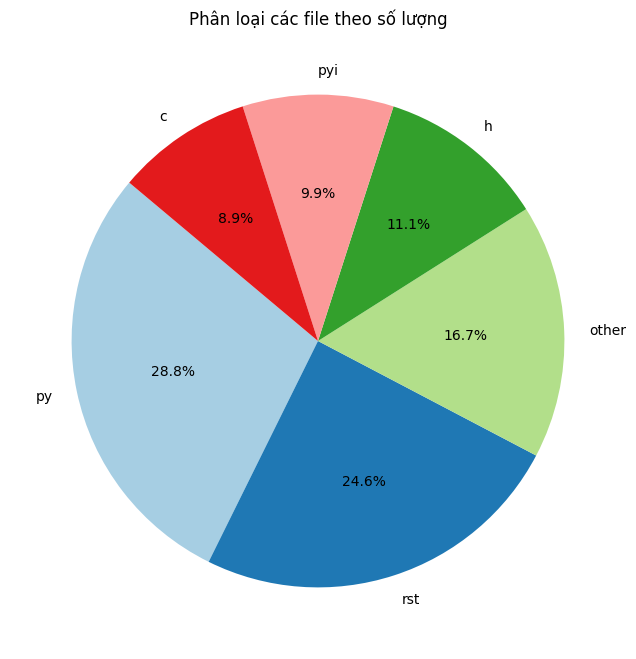

In [ ]:
file_counts_df = pd.read_csv('data_processed/file_extension_counts.csv')

# Tính tổng số lượng file
total_count = file_counts_df['count'].sum()

# Tính tỉ lệ phần trăm cho từng loại file
file_counts_df['percentage'] = (file_counts_df['count'] / total_count) * 100

# Gộp nhóm "other" cho các loại file dưới 5%
threshold = 5
other_df = file_counts_df[file_counts_df['percentage'] < threshold]
main_df = file_counts_df[file_counts_df['percentage'] >= threshold]

# Thêm nhóm "Other" mới
other_row = pd.DataFrame({
    'extension': ['other'],
    'count': [other_df['count'].sum()],
    'percentage': [other_df['percentage'].sum()]
})
main_df = pd.concat([main_df, other_row], ignore_index=True)

# Sắp xếp dữ liệu theo tỷ lệ phần trăm giảm dần
main_df = main_df.sort_values('percentage', ascending=False)

# Vẽ biểu đồ quạt
plt.figure(figsize=(12, 8))
plt.pie(
    main_df['count'], 
    labels=main_df['extension'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Paired.colors
)
plt.title('Phân loại các file theo số lượng')
plt.show()


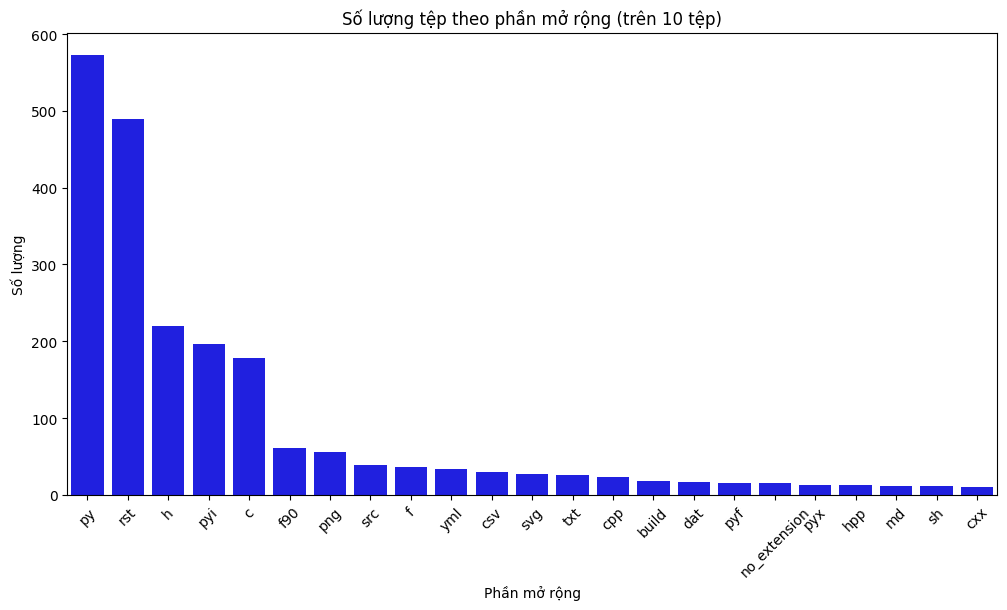

In [ ]:
# 1. Biểu đồ thanh cho số lượng tệp theo loại phần mở rộng

plt.figure(figsize=(12, 6))

# Đếm số lượng tệp theo phần mở rộng
file_extension_counts = files_df['extension'].value_counts()

# Lọc các phần mở rộng có số lượng lớn hơn hoặc bằng 10
filtered_counts = file_extension_counts[file_extension_counts >= 10]

# Vẽ biểu đồ thanh
sns.barplot(x=filtered_counts.index, y=filtered_counts.values, color="blue")
plt.title("Số lượng tệp theo phần mở rộng (trên 10 tệp)")
plt.xlabel("Phần mở rộng")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_15904\3192458343.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


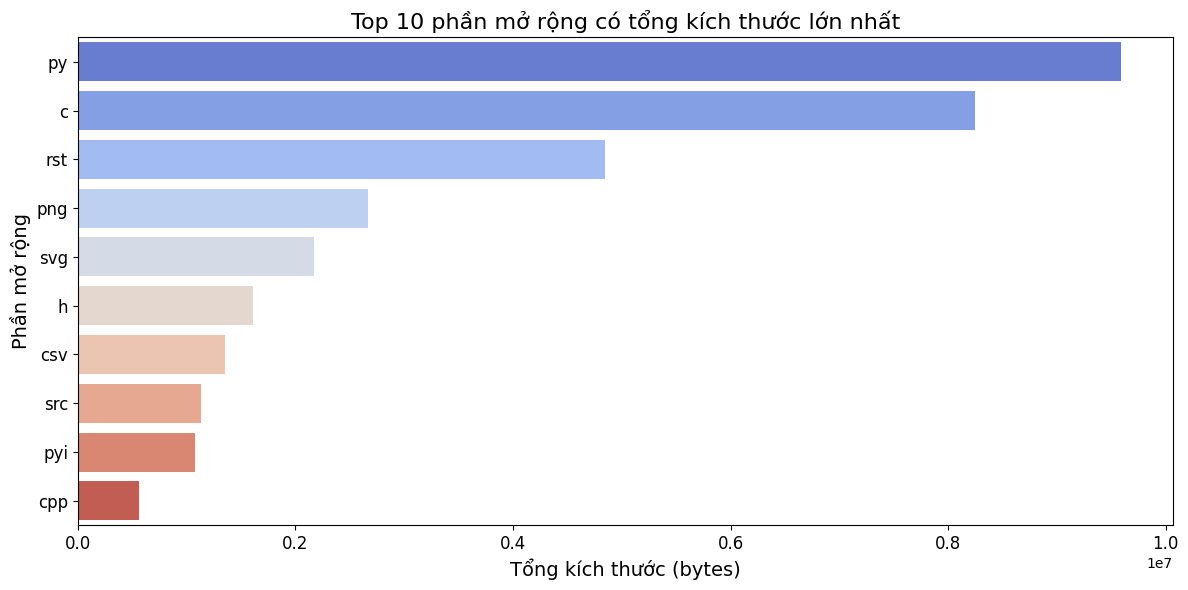

In [ ]:
# Tính tổng kích thước theo phần mở rộng và lấy 10 phần mở rộng lớn nhất
file_extension_sizes = files_df.groupby('extension')['size'].sum().nlargest(10)
# Thiết lập màu sắc từ Seaborn
palette = sns.color_palette("coolwarm", len(file_extension_sizes))

plt.figure(figsize=(12, 6))
sns.barplot(
    x=file_extension_sizes.values,  
    y=file_extension_sizes.index,   
    palette=palette
)

# Tùy chỉnh biểu đồ
plt.title("Top 10 phần mở rộng có tổng kích thước lớn nhất", fontsize=16)
plt.xlabel("Tổng kích thước (bytes)", fontsize=14)
plt.ylabel("Phần mở rộng", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


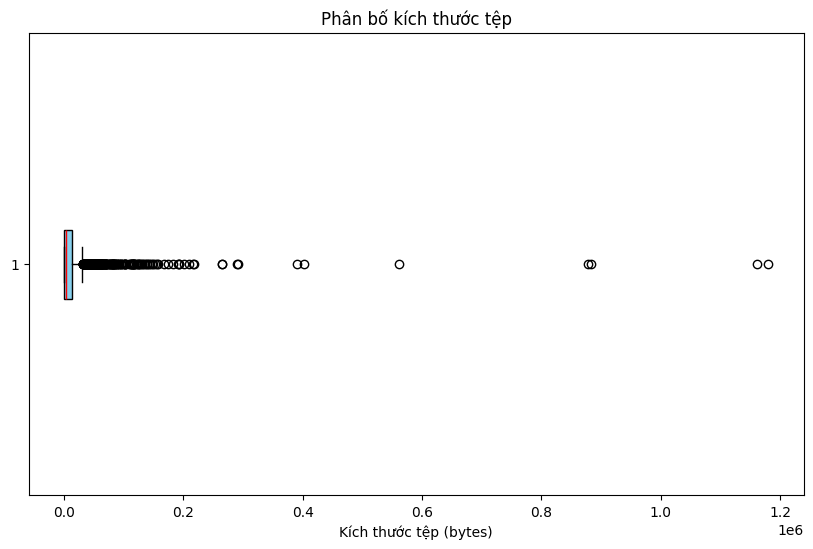

In [ ]:
# 3. Biểu đồ boxplot cho kích thước tệp
plt.figure(figsize=(10, 6))
plt.boxplot(files_df['size'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'), 
            medianprops=dict(color='red'))
plt.title("Phân bố kích thước tệp")
plt.xlabel("Kích thước tệp (bytes)")
plt.show()


ANALYSIS OF LANGUAGES

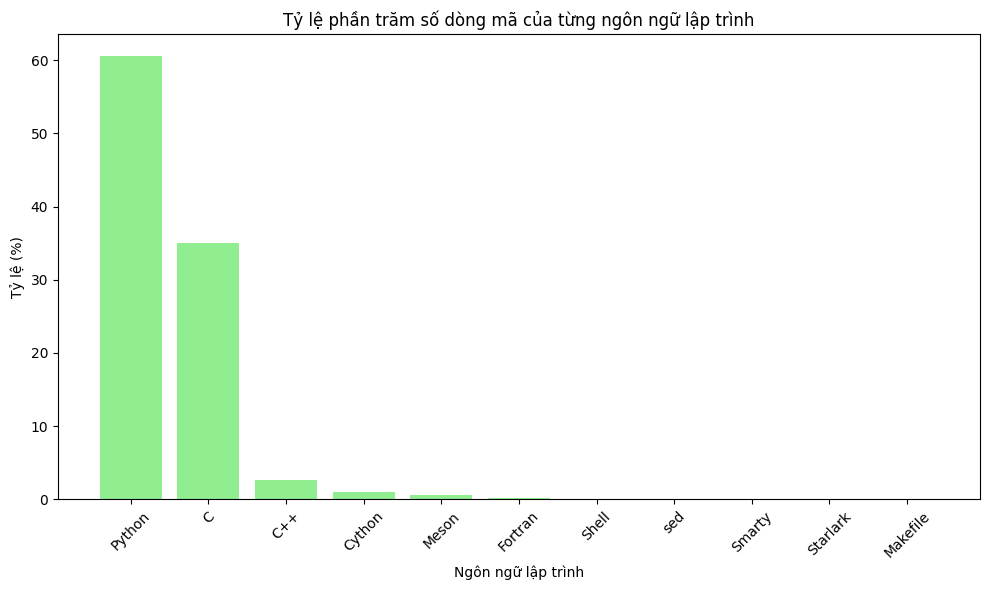

In [10]:
languages_df = pd.read_csv('data_processed/languages.csv')

# Tính tỷ lệ phần trăm
languages_df['percentage'] = (languages_df['lines'] / languages_df['lines'].sum()) * 100

# Vẽ biểu đồ tỷ lệ phần trăm cột
plt.figure(figsize=(10, 6))
plt.bar(languages_df['language'], languages_df['percentage'], color='lightgreen')
plt.xlabel('Ngôn ngữ lập trình')
plt.ylabel('Tỷ lệ (%)')
plt.title('Tỷ lệ phần trăm số dòng mã của từng ngôn ngữ lập trình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


MỐI QUAN HỆ GIỮA CÁC CONTRIBUTOR

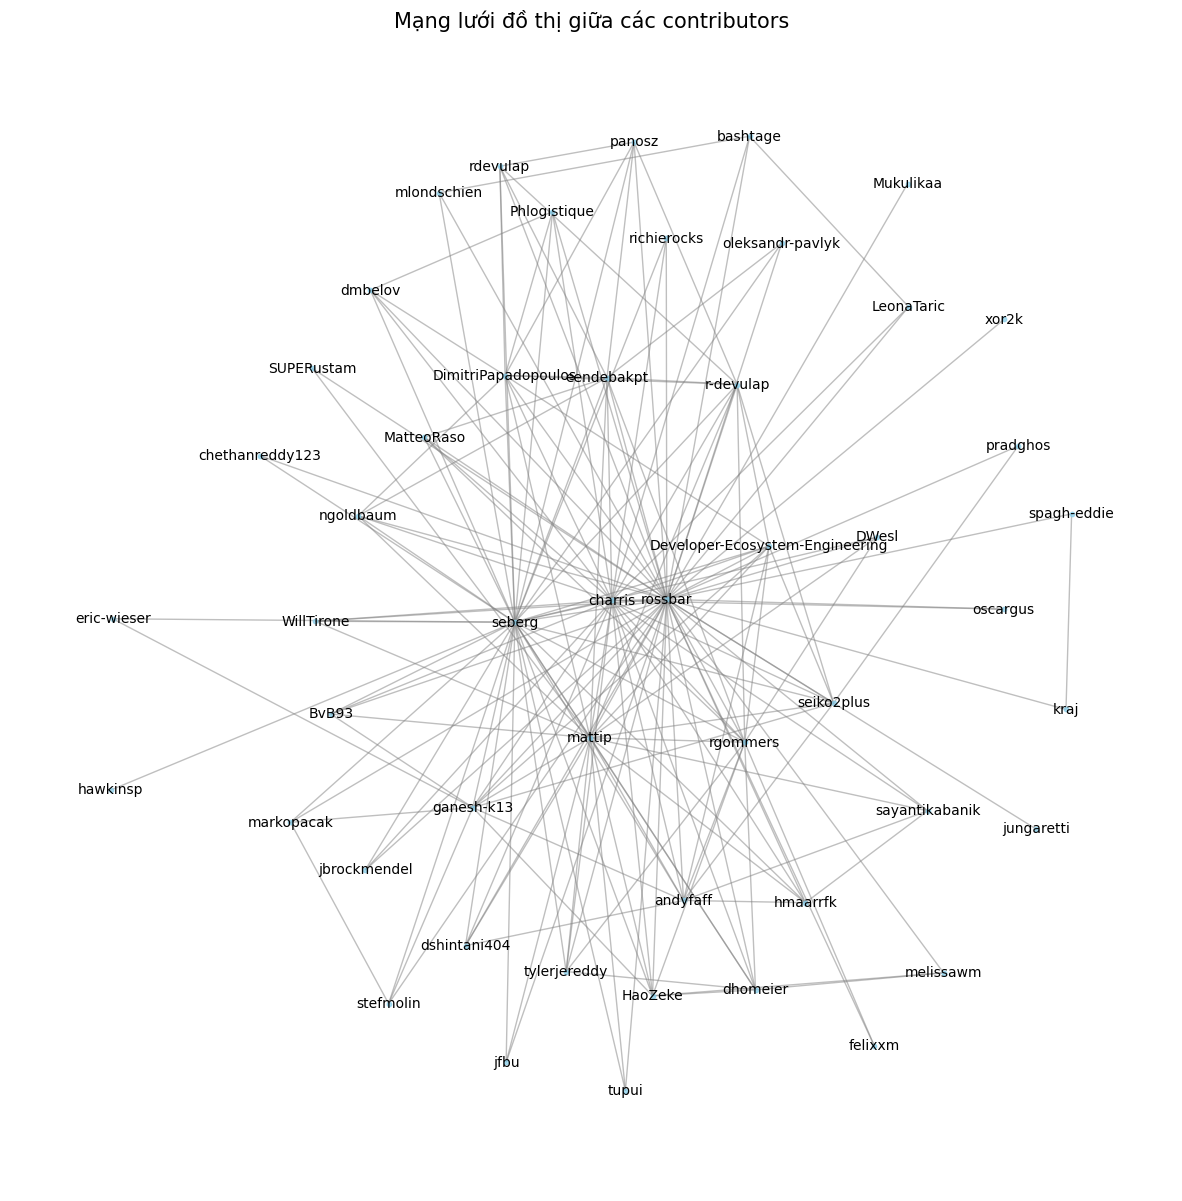

In [11]:
edges_df = pd.read_csv('data_processed/network_graph_edges.csv')
# Tạo đối tượng đồ thị
G = nx.Graph()

# Thêm các edges vào đồ thị
for _, row in edges_df.iterrows():
    G.add_edge(row['source'], row['target'])

plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_edges(G, pos, width=[1 for (u, v, d) in G.edges(data=True)], alpha=0.5, edge_color='grey')
nodes = nx.draw_networkx_nodes(G, pos, node_size=10, node_color='skyblue', alpha=0.7)
labels = nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Mạng lưới đồ thị giữa các contributors', fontsize=15)
plt.axis('off')
plt.show()